In this notebook I test strategies to quickly identify empty arenas in my ball pushing experiments.

In [35]:
import cv2
import platform
from pathlib import Path
import numpy as np
from scipy.signal import find_peaks
from matplotlib import pyplot as plt

In [8]:
# Get the DataFolder

if platform.system() == "Darwin":
    DataPath = Path(
        "/Volumes/Ramdya-Lab/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos"
    )
# Linux Datapath
if platform.system() == "Linux":
    DataPath = Path(
        "/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos"
    )

In [9]:
Emptypath = (
    DataPath / "230719_TNTscreen_Broad_1_Videos_Tracked/arena2/corridor1/corridor1.mp4"
)

Ctrlpath = (
    DataPath
    / "230719_TNTscreen_Broad_1_Videos_Tracked/arena4/corridor2/corridor2.mp4"
)

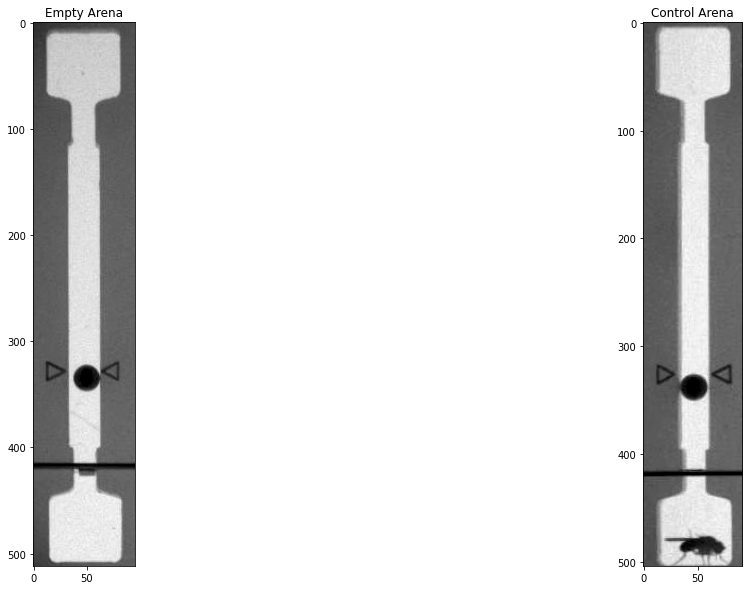

In [12]:
# Load the first frame of empty video and a non empty one

EmptyVid = cv2.VideoCapture(str(Emptypath))
EmptyVid.set(cv2.CAP_PROP_POS_FRAMES, 0)
ret, frame_empty = EmptyVid.read()
EmptyVid.release()

CtrlVid = cv2.VideoCapture(str(Ctrlpath))
CtrlVid.set(cv2.CAP_PROP_POS_FRAMES, 0)
ret, frame_ctrl = CtrlVid.read()
CtrlVid.release()

# Convert to grayscale
EmptyVid = cv2.cvtColor(frame_empty, cv2.COLOR_BGR2GRAY)
CtrlVid = cv2.cvtColor(frame_ctrl, cv2.COLOR_BGR2GRAY)

# Display them side by side
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(EmptyVid, cmap="gray")
ax[0].set_title("Empty Arena")
ax[1].imshow(CtrlVid, cmap="gray")
ax[1].set_title("Control Arena")
plt.show()

In [15]:
# Get the chamber location as the image coordinate that are below the start position in coordinates.npy
# Load the coordinates.npy file
Emptystart, Emptyend = np.load(Emptypath.parent / "coordinates.npy")
Ctrlstart, Ctrlend = np.load(Ctrlpath.parent / "coordinates.npy")

print(Emptystart, Ctrlstart)

387 388


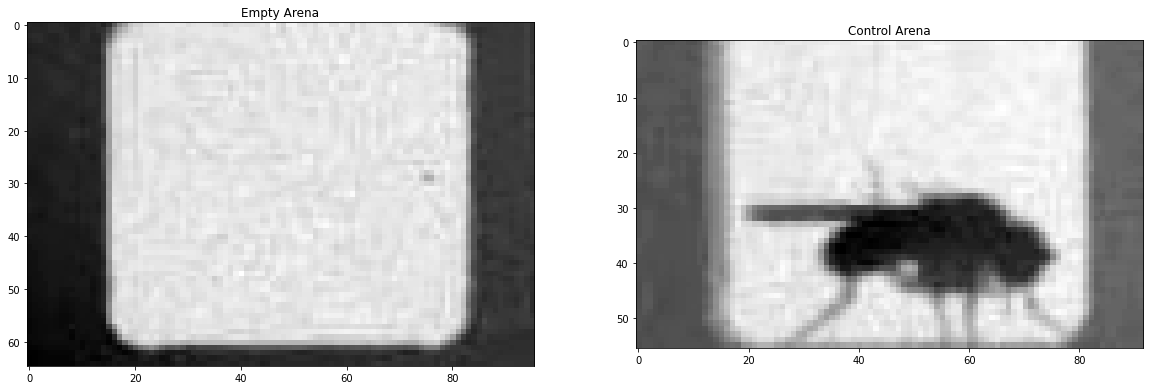

In [30]:
# Crop the frames to the chamber location, which is any y value above the start position
Emptycrop = EmptyVid[Emptystart+60 :, :]

Ctrlcrop = CtrlVid[Ctrlstart+60 :, :]

# Display them side by side
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(Emptycrop, cmap="gray")
ax[0].set_title("Empty Arena")
ax[1].imshow(Ctrlcrop, cmap="gray")
ax[1].set_title("Control Arena")
plt.show()

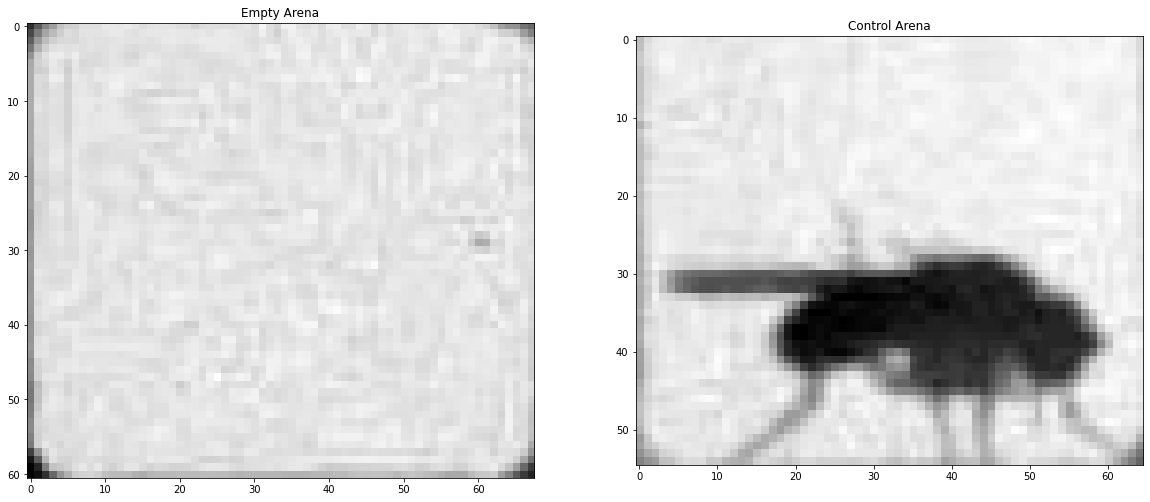

In [31]:
# Detect the edges of the arena and crop the image to the edges
# Empty
edges = cv2.Canny(Emptycrop, 100, 200)
# Find the non zero pixels
nz = np.nonzero(edges)
# Crop the image to the edges
Emptycrop = Emptycrop[
    np.min(nz[0]) : np.max(nz[0]), np.min(nz[1]) : np.max(nz[1])
]

# Control
edges = cv2.Canny(Ctrlcrop, 100, 200)
# Find the non zero pixels
nz = np.nonzero(edges)
# Crop the image to the edges
Ctrlcrop = Ctrlcrop[
    np.min(nz[0]) : np.max(nz[0]), np.min(nz[1]) : np.max(nz[1])
]

# Display them side by side

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(Emptycrop, cmap="gray")
ax[0].set_title("Empty Arena")
ax[1].imshow(Ctrlcrop, cmap="gray")
ax[1].set_title("Control Arena")
plt.show()


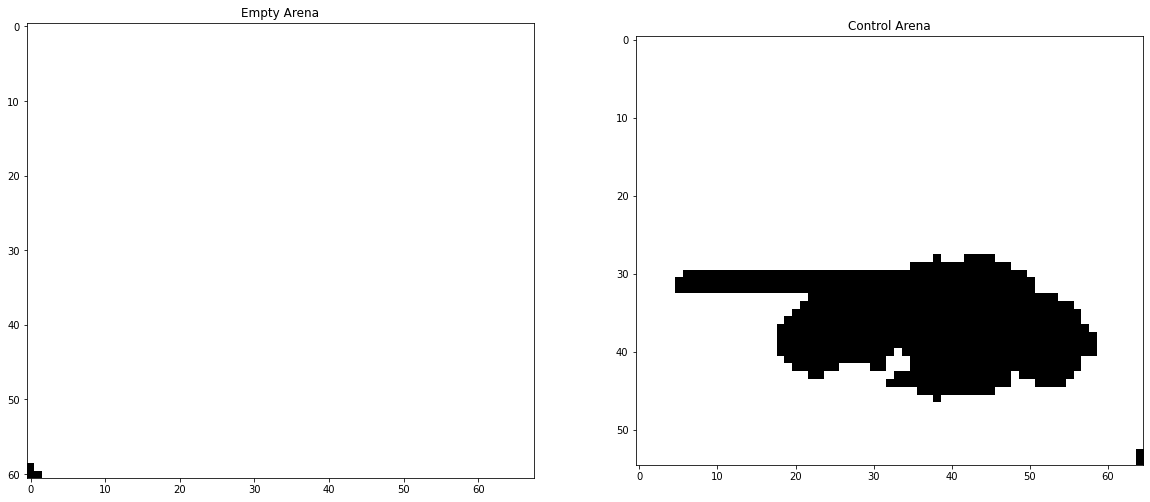

In [32]:
# Binarise the images with a threshold of 50
Emptycrop_bin = Emptycrop > 60
Ctrlcrop_bin = Ctrlcrop > 60

# Display them side by side

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(Emptycrop_bin, cmap="gray")
ax[0].set_title("Empty Arena")
ax[1].imshow(Ctrlcrop_bin, cmap="gray")
ax[1].set_title("Control Arena")
plt.show()


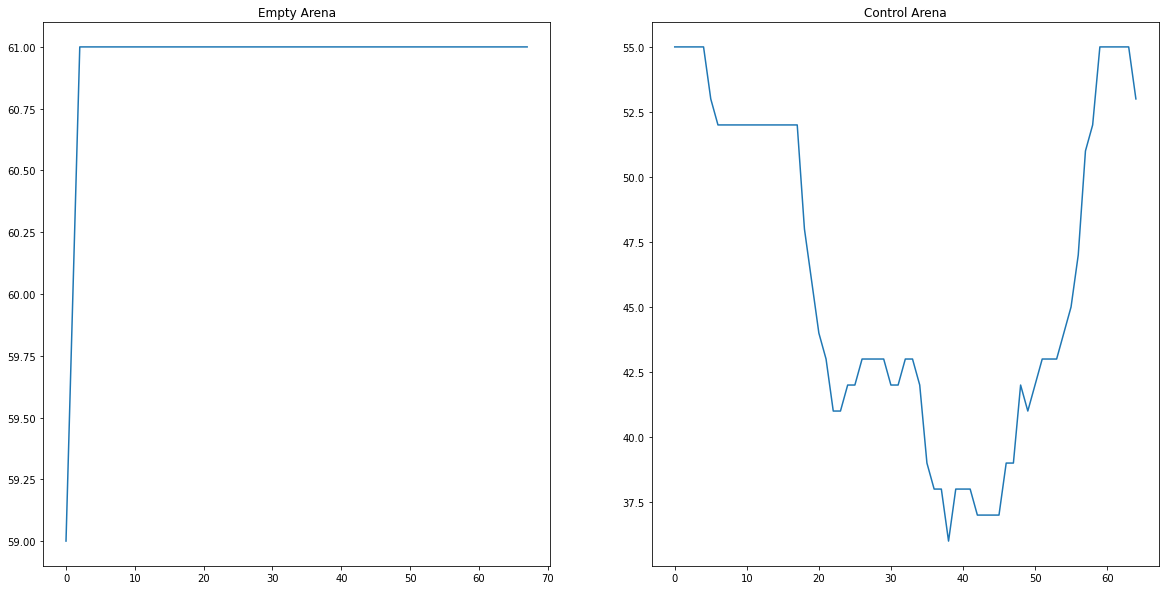

In [33]:


# Get the sum of the pixel values for each frame column
Emptysum = Emptycrop_bin.sum(axis=0)
Ctrlsum = Ctrlcrop_bin.sum(axis=0)

# Plot the sum of the pixel values for each frame column
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].plot(Emptysum)
ax[0].set_title("Empty Arena")
ax[1].plot(Ctrlsum)
ax[1].set_title("Control Arena")
plt.show()

In [38]:
# Check if there's a peak in the sum of the pixel values for each frame column
# Empty
Emptypeaks, _ = find_peaks(Emptysum)

# If there's a peak, the arena is not empty
if len(Emptypeaks) > 0:
    print("Empty arena is not empty")
else :
    print("Empty arena is empty")
    
# Control
Ctrlpeaks, _ = find_peaks(Ctrlsum)

# If there's a peak, the arena is not empty
if len(Ctrlpeaks) > 0:
    print("Control arena is not empty")
else :
    print("Control arena is empty")

Empty arena is empty
Control arena is not empty


Troubelshooting videos that didn't work

In [42]:
Bad1 = DataPath / "230719_TNTscreen_Broad_1_Videos_Tracked/arena8/corridor5/corridor5.mp4"



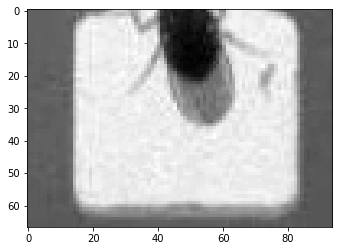

In [57]:
# Load the first frame of empty video and a non empty one

Vid = cv2.VideoCapture(str(Bad1))
Vid.set(cv2.CAP_PROP_POS_FRAMES, 0)
ret, frame_bad = Vid.read()
Vid.release()

# Convert to grayscale
Vid = cv2.cvtColor(frame_bad, cv2.COLOR_BGR2GRAY)

# Get the chamber location as the image coordinate that are below the start position in coordinates.npy
# Load the coordinates.npy file
start, end = np.load(Bad1.parent / "coordinates.npy")

# Crop the frames to the chamber location, which is any y value above the start position
Vidcrop = Vid[start + 40 :, :]

# Display it

plt.imshow(Vidcrop, cmap="gray")

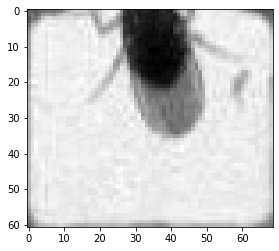

In [58]:
# Detect the edges of the arena and crop the image to the edges
# Empty
edges = cv2.Canny(Vidcrop, 100, 200)
# Find the non zero pixels
nz = np.nonzero(edges)
# Crop the image to the edges
Vidcrop = Vidcrop[np.min(nz[0]) : np.max(nz[0]), np.min(nz[1]) : np.max(nz[1])]

# Display it

plt.imshow(Vidcrop, cmap="gray")

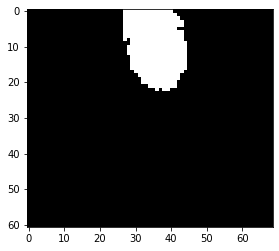

In [59]:
# binarise the image

Vidcrop_bin = Vidcrop < 60

# display it

plt.imshow(Vidcrop_bin, cmap="gray")

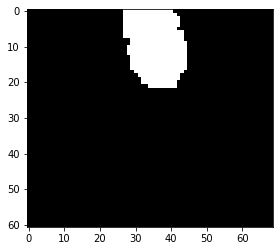

In [60]:
# Apply some morphological operations to remove the noise

# Create a kernel
kernel = np.ones((3, 3), np.uint8)

# Apply an opening operation
Vidcrop_bin = cv2.morphologyEx(Vidcrop_bin.astype(np.uint8), cv2.MORPH_OPEN, kernel)

# Display it
plt.imshow(Vidcrop_bin, cmap="gray")

In [61]:
# Check if there are still white pixels in the image
if np.any(Vidcrop_bin>0):
    print("Arena is not empty")
else:
    print("Arena is empty")

Arena is not empty
